In [3]:
# https://giusedroid.blogspot.com/2015/04/using-python-and-k-means-in-hsv-color.html
%matplotlib inline
import cv2
from scipy.cluster.vq import vq, kmeans
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import glob
import os, os.path
import random
from sklearn.utils import shuffle

# Get images, get sample pixels, create color table where k = 64

In [4]:
# DONE
# https://stackoverflow.com/questions/26392336/importing-images-from-a-directory-python-to-list-or-dictionary
# https://stackoverflow.com/questions/30230592/loading-all-images-using-imread-from-a-given-folder/47114735

images = []
count = 0
path = "C:\Users\Shelby\Desktop\UMKC\Academics\Fall20\ComputerVision\NWPU-RESISC45"
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    for filename in os.listdir(folder_path):
        if count < 100:
            img = cv2.imread(os.path.join(folder_path, filename))
            if img is not None:
                hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
                images.append(hsv_img) 
                count += 1
        else:
            len(images)
            count = 0
            break

len(images)

1500

In [5]:
images[0].shape

(256L, 256L, 3L)

In [6]:
# DONE

flattened_images = []
for image in images:
    flattened_images.append(image.reshape(-1, 3))

flattened_images[0].shape

(65536L, 3L)

In [7]:
# DONE
# https://stackoverflow.com/questions/38190476/use-of-random-state-parameter-in-sklearn-utils-shuffle
# https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html

hsv_train = []
for image in flattened_images:
    sample = shuffle(image, random_state=0)[:100] # shuffle image matrix, then return first 100 pixels
    for pixel in sample:
        hsv_train.append(pixel.astype(np.float))

len(hsv_train) # = 150,000
hsv_train[0] # = 1 x 3 array

array([  94.,   36.,  105.])

In [8]:
# GOAL: Take list of randomly selected pixels (hsv_train) and find the COLOR TABLE where k = 64

hsv_table,_ = kmeans(hsv_train, 64)

In [9]:
hsv_table[0].shape

(3L,)

# Gets histogram for image (bar chart bonus)

In [10]:
# for one image at a time
# https://stackoverflow.com/questions/43650931/python-alternative-for-calculating-pairwise-distance-between-two-sets-of-2d-poin
# https://www.tutorialspoint.com/scipy/scipy_cluster.htm

# c = dim, cluster_data = x, codebook = color_bins
def getHist(im, color_bins):
    cluster_data = im.reshape(-1, 3) # dim should = 3
    [n, dim] = cluster_data.shape # data points
    [m, dim] = color_bins.shape # bin
    
    # find nearest bin to colors using Euclidean distance
    # increment corresponding bin
    # compute distribution
        
    # https://giusedroid.blogspot.com/2015/04/using-python-and-k-means-in-hsv-color.html
    # https://docs.scipy.org/doc/scipy/reference/cluster.vq.html
    # vq: assigns codes from a codebook to obervations
    # quantizes image; assigns each value into one of the predetermined color bins (clusters)
    data, _ = vq(cluster_data[:,0:3], color_bins)
    print len(data)
    print max(data)
    print data
    
    # calculates the number of elements for each cluster
    weights = [len(data[data == i]) for i in range(0,64)]
    print weights
    
    print sum(weights)
    normalized_weights = []
    for weight in weights:
        normalized_weights.append(float(weight)/sum(weights))

    print normalized_weights
    print(sum(normalized_weights))
    plt.bar(np.arange(len(normalized_weights)), normalized_weights)
    
    
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.scatter3D(color_bins[:, 0], color_bins[:, 1], color_bins[:, 2])


65536
63
[26 42  3 ..., 41 41 41]
[114, 0, 492, 5672, 21, 15, 86, 887, 886, 545, 3622, 1, 12974, 1419, 0, 0, 25, 209, 82, 234, 91, 0, 954, 1, 0, 0, 740, 2000, 15, 1537, 1695, 0, 5326, 806, 52, 219, 31, 10, 2049, 0, 9, 1966, 1296, 0, 20, 13751, 41, 2, 0, 62, 0, 123, 1779, 226, 54, 248, 1757, 0, 0, 0, 53, 215, 3, 1121]
65536
[0.001739501953125, 0.0, 0.00750732421875, 0.0865478515625, 0.0003204345703125, 0.0002288818359375, 0.001312255859375, 0.0135345458984375, 0.013519287109375, 0.0083160400390625, 0.055267333984375, 1.52587890625e-05, 0.197967529296875, 0.0216522216796875, 0.0, 0.0, 0.0003814697265625, 0.0031890869140625, 0.001251220703125, 0.003570556640625, 0.0013885498046875, 0.0, 0.014556884765625, 1.52587890625e-05, 0.0, 0.0, 0.01129150390625, 0.030517578125, 0.0002288818359375, 0.0234527587890625, 0.0258636474609375, 0.0, 0.081268310546875, 0.012298583984375, 0.00079345703125, 0.0033416748046875, 0.0004730224609375, 0.000152587890625, 0.0312652587890625, 0.0, 0.0001373291015625, 

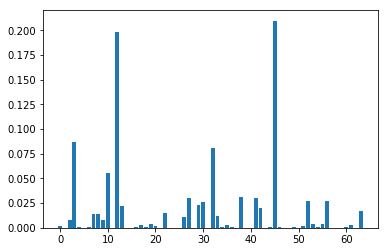

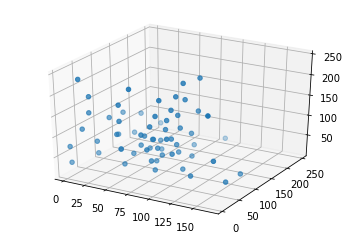

In [11]:
# selects image and prints bar graph
getHist(images[5], hsv_table)